In [9]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:

mtc_results = pd.read_csv('Raw_ZQM_MTC_RESULTS202403.csv',low_memory=False)



In [11]:


mtc_results = pd.read_csv('Raw_ZQM_MTC_RESULTS202403.csv',low_memory=False)
mtc_results = mtc_results[mtc_results["ZROW"] ==1]
mtc_results = mtc_results[mtc_results["WGHT"] != 0.000]

mtc_results.drop(["PCM",
                  # "ERDAT",
                  'MANDT',
                  'ZACTMATNR',
                  'TRAID',
                  'ZCERTNO',
                  'ZCERTSEQ',
                  'ZISSDATE',
                  'GJAHR',
                  'NAME1',
                  'ZFLAG',
                  'STD',
                  "ZIMPACTJR",
                  "ZIMPACTJ0",
                  "ZIMPACTJ2",
                  "ZAVG",
                  "ZIMPACT_KEY",
                  "ZIMPACT_VAL",
                  "ZTEMP",
                  "ZRA",
                  'NB',
                  'SN',
                  'TI',
                  'AL',
                  'CA',
                  'CNT',
                  'DOKNR',
                  "ZKEY",
                  "WERKS",
                  "VBELV",
                  "VBELV",
                  "ZWEIGHT",
                  "ZCSAREA",
                  "ZCSAREA",
                  "ZYSTR",
                  "ZYSTR",
                  "ZTSTR",
                  "ZELOG",
                  "ZNMNL",
                  "ZGL",
                  "ZMAKTX",
                  "MATNR"
                  ], axis=1, inplace=True)

mtc_results.head(10)
mtc_results.drop_duplicates(inplace=True)
mtc_results.dropna(inplace=True)


In [12]:

# mtc_results["WERKS"].value_counts()


In [13]:
# phase 4 rm04 
mtc_results["WGHT"].sum()


568555.9870000001

In [14]:
mtc_results.describe()



VBELN     ZROW         ERDAT       ZCARBON      ZSILICON  \
count  9.962200e+04  99622.0  9.962200e+04  99622.000000  99622.000000   
mean   7.649077e+07      1.0  2.023065e+07      0.176517      0.237872   
std    5.685844e+06      0.0  3.537437e+02      0.015091      0.043624   
min    1.052301e+07      1.0  2.023010e+07      0.054600      0.160333   
25%    7.073735e+07      1.0  2.023032e+07      0.166000      0.204333   
50%    8.050014e+07      1.0  2.023062e+07      0.178333      0.225667   
75%    8.051780e+07      1.0  2.023093e+07      0.188367      0.264667   
max    8.053673e+07      1.0  2.023123e+07      0.240000      0.383133   

              ZMANG         ZPHOS         ZSULP        ZNITRO         ZCOPP  \
count  99622.000000  99622.000000  99622.000000  99622.000000  99622.000000   
mean       1.258808      0.011573      0.010117      0.009928      0.007713   
std        0.109682      0.002915      0.002830      0.001022      0.007801   
min        0.712567      0.004000      0.000900      0.002000      0.000533   
25%        1.197667      0.009433      0.008200      0.009200      0.003333   
50%        1.279333      0.011100      0.009733      0.009900      0.004333   
75%        1.312908      0.013167      0.011567      0.010667      0.008333   
max        1.587233      0.027833      0.027700      0.013633      0.073667   

             ZCHROM         ZMOLY         ZNICK         ZVAND        ZBORON  \
count  99622.000000  99622.000000  99622.000000  99622.000000  99622.000000   
mean       0.018559      0.001692      0.011421      0.036421      0.000543   
std        0.005164      0.001552      0.005492      0.019056      0.000085   
min        0.008000      0.000000      0.002367      0.001700      0.000000   
25%        0.015667      0.001000      0.008667      0.023300      0.000500   
50%        0.017333      0.001000      0.010000      0.049233      0.000567   
75%        0.020000      0.002000      0.013000      0.053400      0.000600   
max        0.227233      0.031667      0.068333      0.083633      0.000900   

               ZCEQ          WGHT  
count  99622.000000  99622.000000  
mean       0.398928      5.707133  
std        0.028149      6.212515  
min        0.265591      0.199000  
25%        0.379238      1.869000  
50%        0.408620      3.686000  
75%        0.418691      6.651000  
max        0.491300     53.336000

In [15]:


zqm_limuts = pd.read_csv('new_data/ZQM_LIMITS_SMP.csv')
zqm_limuts.drop('MANDT', axis=1, inplace=True)
zqm_limuts.drop(["WERKS","FT_FRM","FT_TO","AEDAT","AENAM","ERNAM","WGBEZ","ERDAT"], axis=1,errors="ignore", inplace=True)
zqm_limuts.dropna(inplace=True)
zqm_limuts.drop_duplicates(inplace=True)




In [16]:

# optional:
common_matkl = set(mtc_results["MATKL"]) & set(zqm_limuts["MATKL"])  # Find intersection
mtc_results = mtc_results[mtc_results["MATKL"].isin(common_matkl)]
zqm_limuts = zqm_limuts[zqm_limuts["MATKL"].isin(common_matkl)]


In [17]:


# Assuming we want to sort and keep the highest value rows for all columns except 'MATKL'
# Get all column names except 'MATKL'
sort_columns = [col for col in zqm_limuts.columns if col != 'MATKL']

# Sort by 'MATKL' and all other columns in descending order to make sure the highest values are considered last
zqm_limuts = zqm_limuts.sort_values(by=['MATKL'] + sort_columns, ascending=[True] + [False] * len(sort_columns))

# Drop duplicates in 'MATKL', keeping the last entry which, due to sorting, will have the highest values across all columns for each 'MATKL'
zqm_limuts = zqm_limuts.drop_duplicates(subset=['MATKL'], keep='last')

zqm_limuts


MATKL  Z_C_HI  Z_C_LOW  Z_SI_HI  Z_SI_LOW  Z_MG_HI  Z_MG_LOW  \
95         085    0.24      0.0     0.55      0.00     1.60       0.0   
97    085-2062    0.20      0.0     0.45      0.10     1.55       0.0   
100  085-E350C    0.20      0.0     0.45      0.10     1.55       0.0   
103     085-J2    0.20      0.0     0.55      0.00     1.60       0.0   
108   085-J2-M    0.20      0.0     0.55      0.00     1.60       0.0   
112      085-M    0.24      0.0     0.55      0.00     1.60       0.0   
115        086    0.21      0.0     0.55      0.00     1.50       0.0   
123      086-M    0.21      0.0     0.55      0.00     1.50       0.0   
130        092    0.23      0.0     0.40      0.00     1.60       0.5   
133        093    0.23      0.0     0.40      0.00     1.60       0.0   
134    093-092    0.22      0.0     0.40      0.00     1.50       0.5   
137  093-092-C    0.22      0.0     0.40      0.15     1.50       0.5   
153        098    0.20      0.0     0.55      0.00     1.60       0.0   
159      098-M    0.20      0.0     0.55      0.00     1.60       0.0   
163        099    0.18      0.0     0.55      0.00     1.50       0.0   
170        100    0.26      0.0     0.40      0.00     1.55       0.0   
181        102    0.17      0.0     0.55      0.00     1.40       0.0   
185      102-M    0.17      0.0     0.55      0.00     1.40       0.0   
254  AA572GR60    0.24      0.0     0.40      0.00     1.47       0.0   
277  ASTMA992M    0.23      0.0     0.40      0.00     1.60       0.5   
355       G300    0.25      0.0     0.50      0.00     1.60       0.0   
436     S275J2    0.18      0.0     0.55      0.00     1.50       0.0   
442   S355 MLO    0.14      0.1     0.55      0.00     1.65       1.0   
445     S355GP    0.24      0.0     0.55      0.00     1.60       0.0   
446  S355GP350    0.20      0.0     0.45      0.10     1.55       0.0   
453     S355K2    0.20      0.0     0.55      0.00     1.60       0.0   
460    S355MLO    0.14      0.1     0.55      0.00     1.65       1.0   
461     S390GP    0.24      0.0     0.55      0.00     1.60       0.0   
462     S430GP    0.24      0.0     0.55      0.00     1.60       0.0   
463  S430GP-IS    0.20      0.0     0.45      0.10     1.60       0.0   

     Z_PH_HI  Z_PH_LOW  Z_S_HI  ...  Z_B_HI  Z_B_LOW  Z_CEQ_HI  Z_CEQ_LOW  \
95     0.035       0.0   0.035  ...  0.0010      0.0      0.45        0.0   
97     0.045       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
100    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
103    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
108    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
112    0.035       0.0   0.035  ...  0.0010      0.0      0.45        0.0   
115    0.035       0.0   0.035  ...  0.1000      0.0      0.40        0.0   
123    0.035       0.0   0.035  ...  0.0011      0.0      0.40        0.0   
130    0.035       0.0   0.045  ...  0.1000      0.0      0.45        0.0   
133    0.040       0.0   0.050  ...  0.0010      0.0      0.49        0.0   
134    0.035       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
137    0.035       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
153    0.030       0.0   0.030  ...  0.1000      0.0      0.45        0.0   
159    0.030       0.0   0.030  ...  0.0010      0.0      0.45        0.0   
163    0.030       0.0   0.030  ...  0.1000      0.0      0.40        0.0   
170    0.040       0.0   0.050  ...  0.0010      0.0      0.47        0.0   
181    0.035       0.0   0.035  ...  0.1000      0.0      0.35        0.0   
185    0.035       0.0   0.035  ...  0.0010      0.0      0.35        0.0   
254    0.040       0.0   0.050  ...  0.0010      0.0      0.50        0.0   
277    0.035       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
355    0.040       0.0   0.040  ...  0.1000      0.0      0.44        0.0   
436    0.025       0.0   0.025  ...  0.0010      0.

In [18]:

zqm_limuts.columns.to_list(
)


['MATKL',
 'Z_C_HI',
 'Z_C_LOW',
 'Z_SI_HI',
 'Z_SI_LOW',
 'Z_MG_HI',
 'Z_MG_LOW',
 'Z_PH_HI',
 'Z_PH_LOW',
 'Z_S_HI',
 'Z_S_LOW',
 'Z_N2_HI',
 'Z_N2_LOW',
 'Z_CU_HI',
 'Z_CU_LOW',
 'Z_CR_HI',
 'Z_CR_LOW',
 'Z_MB_HI',
 'Z_MB_LOW',
 'Z_NI_HI',
 'Z_NI_LOW',
 'Z_VN_HI',
 'Z_VN_LOW',
 'Z_B_HI',
 'Z_B_LOW',
 'Z_CEQ_HI',
 'Z_CEQ_LOW',
 'Z_TI_HI',
 'Z_TI_LOW',
 'Z_NB_HI',
 'Z_NB_LOW',
 'Z_SN_HI',
 'Z_SN_LOW']

1. MTC results MATKL is the material group, we can connect it to zqm_limits by MATKL :
2. Maps columns to be used by analysis so the chems or ferroalloys results of mtc results must fall in the range of zqm_limits. 
3. visualize by material group and overshot or undershot of ferroalloys.

In [47]:

float_columns = [
                 'ZCARBON',
                 'ZSILICON',
                 'ZMANG',
                 'ZPHOS',
                 'ZSULP',
                 'ZNITRO',
                 'ZCOPP',
                 'ZCHROM',
                 'ZMOLY',
                 'ZNICK',
                 'ZVAND',
                 'ZBORON',
                 'ZCEQ']

mtc_results.loc[:, float_columns] = mtc_results.loc[:, float_columns].apply(lambda x: pd.to_numeric(x))
mtc_results.loc[:, "ZCARBON"] = mtc_results["ZCARBON"].astype(float)


In [31]:

df_2 = mtc_results.copy()
df_2.head(10)


VBELN    ZCASTNO  ZROW     ERDAT  MATKL   ZCARBON  ZSILICON     ZMANG  \
110  20523615  2084378.0     1  20230918  098-M  0.112333  0.242433  1.423633   
113  20523615  2093357.0     1  20230918  098-M  0.110200  0.209367  1.423067   
116  20523615  2093359.0     1  20230918  098-M  0.104433  0.221633  1.447233   
119  20523615  2093364.0     1  20230918  098-M  0.110767  0.242233  1.439700   
122  20523615  2097143.0     1  20230918  098-M  0.105667  0.199667  1.428000   
224  20524285  2101912.0     1  20230926  098-M  0.161667  0.272667  1.380667   
227  20524285  2101913.0     1  20230926  098-M  0.156333  0.273667  1.376333   
266  20524343  2101908.0     1  20230927  098-M  0.163667  0.270667  1.384333   
281  20524347  2101888.0     1  20230927  098-M  0.159333  0.281333  1.352000   
284  20524347  2101890.0     1  20230927  098-M  0.159667  0.290333  1.347000   

        ZPHOS     ZSULP    ZNITRO     ZCOPP    ZCHROM     ZMOLY     ZNICK  \
110  0.011500  0.008000  0.009433  0.004467  0.018100  0.001900  0.012033   
113  0.011933  0.006967  0.010200  0.003267  0.015433  0.001133  0.011167   
116  0.011533  0.006567  0.009767  0.002867  0.017300  0.000933  0.010700   
119  0.011533  0.007967  0.009367  0.004433  0.015667  0.001333  0.011000   
122  0.009233  0.009933  0.010733  0.004667  0.013000  0.001000  0.007667   
224  0.008667  0.008100  0.009700  0.016667  0.022667  0.004000  0.019667   
227  0.009633  0.007767  0.009000  0.006000  0.016000  0.002000  0.014000   
266  0.008000  0.008067  0.009633  0.009333  0.019333  0.003333  0.016333   
281  0.007867  0.007933  0.008933  0.008333  0.018333  0.002333  0.014333   
284  0.008400  0.005900  0.010867  0.003333  0.016000  0.002000  0.012000   

        ZVAND    ZBORON      ZCEQ   WGHT  
110  0.047067  0.000633  0.364119  1.406  
113  0.048433  0.000633  0.361340  1.406  
116  0.047833  0.000600  0.359757  1.406  
119  0.052467  0.000600  0.365639  2.811  
122  0.045567  0.000600  0.356402  1.406  
224  0.054233  0.000500  0.410380  1.030  
227  0.055433  0.000533  0.401742  2.061  
266  0.052100  0.000533  0.411053  1.527  
281  0.054033  0.000600  0.401118  2.582  
284  0.056267  0.000600  0.400042  5.680

In [49]:


zqm_limuts.head(10)


MATKL  Z_C_HI  Z_C_LOW  Z_SI_HI  Z_SI_LOW  Z_MG_HI  Z_MG_LOW  \
95         085    0.24      0.0     0.55       0.0     1.60       0.0   
97    085-2062    0.20      0.0     0.45       0.1     1.55       0.0   
100  085-E350C    0.20      0.0     0.45       0.1     1.55       0.0   
103     085-J2    0.20      0.0     0.55       0.0     1.60       0.0   
108   085-J2-M    0.20      0.0     0.55       0.0     1.60       0.0   
112      085-M    0.24      0.0     0.55       0.0     1.60       0.0   
115        086    0.21      0.0     0.55       0.0     1.50       0.0   
123      086-M    0.21      0.0     0.55       0.0     1.50       0.0   
130        092    0.23      0.0     0.40       0.0     1.60       0.5   
133        093    0.23      0.0     0.40       0.0     1.60       0.0   

     Z_PH_HI  Z_PH_LOW  Z_S_HI  ...  Z_B_HI  Z_B_LOW  Z_CEQ_HI  Z_CEQ_LOW  \
95     0.035       0.0   0.035  ...  0.0010      0.0      0.45        0.0   
97     0.045       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
100    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
103    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
108    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
112    0.035       0.0   0.035  ...  0.0010      0.0      0.45        0.0   
115    0.035       0.0   0.035  ...  0.1000      0.0      0.40        0.0   
123    0.035       0.0   0.035  ...  0.0011      0.0      0.40        0.0   
130    0.035       0.0   0.045  ...  0.1000      0.0      0.45        0.0   
133    0.040       0.0   0.050  ...  0.0010      0.0      0.49        0.0   

     Z_TI_HI  Z_TI_LOW  Z_NB_HI  Z_NB_LOW  Z_SN_HI  Z_SN_LOW  
95     0.015     0.000     0.06       0.0     0.02       0.0  
97     0.015     0.000     0.06       0.0     0.02       0.0  
100    0.015     0.010     0.03       0.0     0.02       0.0  
103    0.015     0.012     0.06       0.0     0.02       0.0  
108    0.015     0.012     0.06       0.0     0.02       0.0  
112    0.015     0.000     0.06       0.0     0.02       0.0  
115    0.000     0.000     0.00       0.0     0.00       0.0  
123    0.015     0.000     0.06       0.0     0.02       0.0  
130    0.000     0.000     0.00       0.0     0.00       0.0  
133    0.015     0.000     0.06       0.0     0.02       0.0  

[10 rows x 33 columns]

# Results-1

In [50]:

common_matkl = set(mtc_results["MATKL"]) & set(zqm_limuts["MATKL"])  # Find intersection
mtc_results = mtc_results[mtc_results["MATKL"].isin(common_matkl)]


In [51]:
# 23 Material Groups
mtc_results["MATKL"].nunique()



30

In [52]:

mtc_results.duplicated().sum()


0

In [53]:


num_unique_rows = mtc_results.drop_duplicates().shape[0]
print("Number of unique MTC results:", num_unique_rows)




Number of unique MTC results: 99305


In [54]:

mtc_results["VBELN"].nunique()


30253

In [55]:

# 107364 tons
mtc_results["WGHT"].sum()


567337.9169999999

$$\[ S = \left( \frac{\sum_{i=k} (F_i \times W_i)}{100} \right) \times P \]$$

In [56]:
zqm_limuts

MATKL  Z_C_HI  Z_C_LOW  Z_SI_HI  Z_SI_LOW  Z_MG_HI  Z_MG_LOW  \
95         085    0.24      0.0     0.55      0.00     1.60       0.0   
97    085-2062    0.20      0.0     0.45      0.10     1.55       0.0   
100  085-E350C    0.20      0.0     0.45      0.10     1.55       0.0   
103     085-J2    0.20      0.0     0.55      0.00     1.60       0.0   
108   085-J2-M    0.20      0.0     0.55      0.00     1.60       0.0   
112      085-M    0.24      0.0     0.55      0.00     1.60       0.0   
115        086    0.21      0.0     0.55      0.00     1.50       0.0   
123      086-M    0.21      0.0     0.55      0.00     1.50       0.0   
130        092    0.23      0.0     0.40      0.00     1.60       0.5   
133        093    0.23      0.0     0.40      0.00     1.60       0.0   
134    093-092    0.22      0.0     0.40      0.00     1.50       0.5   
137  093-092-C    0.22      0.0     0.40      0.15     1.50       0.5   
153        098    0.20      0.0     0.55      0.00     1.60       0.0   
159      098-M    0.20      0.0     0.55      0.00     1.60       0.0   
163        099    0.18      0.0     0.55      0.00     1.50       0.0   
170        100    0.26      0.0     0.40      0.00     1.55       0.0   
181        102    0.17      0.0     0.55      0.00     1.40       0.0   
185      102-M    0.17      0.0     0.55      0.00     1.40       0.0   
254  AA572GR60    0.24      0.0     0.40      0.00     1.47       0.0   
277  ASTMA992M    0.23      0.0     0.40      0.00     1.60       0.5   
355       G300    0.25      0.0     0.50      0.00     1.60       0.0   
436     S275J2    0.18      0.0     0.55      0.00     1.50       0.0   
442   S355 MLO    0.14      0.1     0.55      0.00     1.65       1.0   
445     S355GP    0.24      0.0     0.55      0.00     1.60       0.0   
446  S355GP350    0.20      0.0     0.45      0.10     1.55       0.0   
453     S355K2    0.20      0.0     0.55      0.00     1.60       0.0   
460    S355MLO    0.14      0.1     0.55      0.00     1.65       1.0   
461     S390GP    0.24      0.0     0.55      0.00     1.60       0.0   
462     S430GP    0.24      0.0     0.55      0.00     1.60       0.0   
463  S430GP-IS    0.20      0.0     0.45      0.10     1.60       0.0   

     Z_PH_HI  Z_PH_LOW  Z_S_HI  ...  Z_B_HI  Z_B_LOW  Z_CEQ_HI  Z_CEQ_LOW  \
95     0.035       0.0   0.035  ...  0.0010      0.0      0.45        0.0   
97     0.045       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
100    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
103    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
108    0.025       0.0   0.025  ...  0.0010      0.0      0.45        0.0   
112    0.035       0.0   0.035  ...  0.0010      0.0      0.45        0.0   
115    0.035       0.0   0.035  ...  0.1000      0.0      0.40        0.0   
123    0.035       0.0   0.035  ...  0.0011      0.0      0.40        0.0   
130    0.035       0.0   0.045  ...  0.1000      0.0      0.45        0.0   
133    0.040       0.0   0.050  ...  0.0010      0.0      0.49        0.0   
134    0.035       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
137    0.035       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
153    0.030       0.0   0.030  ...  0.1000      0.0      0.45        0.0   
159    0.030       0.0   0.030  ...  0.0010      0.0      0.45        0.0   
163    0.030       0.0   0.030  ...  0.1000      0.0      0.40        0.0   
170    0.040       0.0   0.050  ...  0.0010      0.0      0.47        0.0   
181    0.035       0.0   0.035  ...  0.1000      0.0      0.35        0.0   
185    0.035       0.0   0.035  ...  0.0010      0.0      0.35        0.0   
254    0.040       0.0   0.050  ...  0.0010      0.0      0.50        0.0   
277    0.035       0.0   0.045  ...  0.0010      0.0      0.45        0.0   
355    0.040       0.0   0.040  ...  0.1000      0.0      0.44        0.0   
436    0.025       0.0   0.025  ...  0.0010      0.

In [22]:

import pandas as pd
import numpy as np
for col in mtc_results.columns:
    if col.startswith('Z'):
        mtc_results[col] = pd.to_numeric(mtc_results[col], errors='coerce')

# Now calculate mean values for each ferroalloy per steel grade
avg_mtc_results = mtc_results.groupby('MATKL').mean().reset_index()
# Assuming 'mtc_results' is your DataFrame with MTC results and 'zqm_limits' has the ferroalloy limits
# Rename columns in zqm_limits for better clarity
# zqm_limuts.columns = ['MATKL', 'Z_C_HI', 'Z_C_LOW', 'Z_N2_HI', 'Z_N2_LOW', 'Z_SI_HI', 'Z_SI_LOW',
#                       'Z_PH_HI', 'Z_PH_LOW', 'Z_S_HI', 'Z_S_LOW', 'Z_CU_HI', 'Z_CU_LOW', 'Z_CR_HI',
#                       'Z_CR_LOW', 'Z_MB_HI', 'Z_MB_LOW', 'Z_NI_HI', 'Z_NI_LOW', 'Z_VN_HI', 'Z_VN_LOW',
#                       'Z_B_HI', 'Z_B_LOW', 'Z_CEQ_HI', 'Z_CEQ_LOW']

# Calculate mean values for each ferroalloy per steel grade in mtc_results
avg_mtc_results = mtc_results.groupby('MATKL').mean().reset_index()

# Merge the average results DataFrame with the limits DataFrame on the 'MATKL' column
analysis_df = pd.merge(avg_mtc_results, zqm_limuts, on='MATKL', how='left')

# Define a function to compare averages with limits
def check_within_limits(row, element, hi_col, low_col):
    if row[element] >= row[low_col] and row[element] <= row[hi_col]:
        return 'Within Limits'
    else:
        return 'Outside Limits'

# List of elements to check
elements = ['ZCARBON', 'ZNITRO', 'ZSILICON', 'ZPHOS', 'ZSULP', 'ZCOPP',
            'ZCHROM', 'ZMOLY', 'ZNICK', 'ZVAND', 'ZBORON', 'ZCEQ']

# Applying the function to each element
for element in elements:
    hi_col = f'{element.split("Z")[1]}_HI'
    low_col = f'{element.split("Z")[1]}_LOW'
    analysis_df[f'{element}_STATUS'] = analysis_df.apply(lambda row: check_within_limits(row, element, hi_col, low_col), axis=1)

# Print the DataFrame with the comparison results to review
print(analysis_df[['MATKL'] + [f'{el}_STATUS' for el in elements]])




KeyError: 'CARBON_LOW'

In [24]:


zqm_limuts.columns.to_list(
    
)


['MATKL',
 'Z_C_HI',
 'Z_C_LOW',
 'Z_SI_HI',
 'Z_SI_LOW',
 'Z_MG_HI',
 'Z_MG_LOW',
 'Z_PH_HI',
 'Z_PH_LOW',
 'Z_S_HI',
 'Z_S_LOW',
 'Z_N2_HI',
 'Z_N2_LOW',
 'Z_CU_HI',
 'Z_CU_LOW',
 'Z_CR_HI',
 'Z_CR_LOW',
 'Z_MB_HI',
 'Z_MB_LOW',
 'Z_NI_HI',
 'Z_NI_LOW',
 'Z_VN_HI',
 'Z_VN_LOW',
 'Z_B_HI',
 'Z_B_LOW',
 'Z_CEQ_HI',
 'Z_CEQ_LOW',
 'Z_TI_HI',
 'Z_TI_LOW',
 'Z_NB_HI',
 'Z_NB_LOW',
 'Z_SN_HI',
 'Z_SN_LOW']

In [32]:


import pandas as pd
import numpy as np

# Assuming 'mtc_results' is your DataFrame with MTC results and 'zqm_limits' has the ferroalloy limits
# Make sure zqm_limits columns are named correctly as listed

# Convert columns to numeric, assuming all columns that should be numeric start with 'Z'
for col in mtc_results.columns:
    if col.startswith('Z'):
        mtc_results[col] = pd.to_numeric(mtc_results[col], errors='coerce')

# Calculate mean values for each ferroalloy per steel grade in mtc_results
avg_mtc_results = mtc_results.groupby('MATKL').mean().reset_index()

# Merge the average results DataFrame with the limits DataFrame on the 'MATKL' column
analysis_df = pd.merge(avg_mtc_results, zqm_limuts, on='MATKL', how='left')

# Define a function to compare averages with limits
def check_within_limits(row, element, hi_col, low_col):
    if row[element] >= row[low_col] and row[element] <= row[hi_col]:
        return 'Within Limits'
    else:
        return 'Outside Limits'

# List of elements to check, adjusted for your column names
elements = {
    "ZC": ('Z_C_HI', 'Z_C_LOW'),
    "ZN": ('Z_N2_HI', 'Z_N2_LOW'),
    "ZSI": ('Z_SI_HI', 'Z_SI_LOW'),
    "ZP": ('Z_PH_HI', 'Z_PH_LOW'),
    "ZS": ('Z_S_HI', 'Z_S_LOW'),
    "ZCU": ('Z_CU_HI', 'Z_CU_LOW'),
    "ZCR": ('Z_CR_HI', 'Z_CR_LOW'),
    "ZMB": ('Z_MB_HI', 'Z_MB_LOW'),
    "ZNI": ('Z_NI_HI', 'Z_NI_LOW'),
    "ZVN": ('Z_VN_HI', 'Z_VN_LOW'),
    "ZB": ('Z_B_HI', 'Z_B_LOW'),
    "ZCEQ": ('Z_CEQ_HI', 'Z_CEQ_LOW'),
    "ZTI": ('Z_TI_HI', 'Z_TI_LOW'),
    "ZNB": ('Z_NB_HI', 'Z_NB_LOW'),
    "ZSN": ('Z_SN_HI', 'Z_SN_LOW')
}

# Applying the function to each element
for element, (hi_col, low_col) in elements.items():
    analysis_df[f'{element}_STATUS'] = analysis_df.apply(lambda row: check_within_limits(row, element, hi_col, low_col), axis=1)

# Print the DataFrame with the comparison results to review
print(analysis_df[['MATKL'] + [f'{el}_STATUS' for el in elements]])



KeyError: 'ZC'

In [29]:

import pandas as pd
import numpy as np

# Assuming 'mtc_results' is your DataFrame with MTC results and 'zqm_limits' has the ferroalloy limits
# Make sure zqm_limits columns are named correctly as listed

# Convert columns to numeric, assuming all columns that should be numeric start with 'Z'
for col in mtc_results.columns:
    if col.startswith('Z'):
        mtc_results[col] = pd.to_numeric(mtc_results[col], errors='coerce')

# Calculate mean values for each ferroalloy per steel grade in mtc_results
avg_mtc_results = mtc_results.groupby('MATKL').mean().reset_index()

# Merge the average results DataFrame with the limits DataFrame on the 'MATKL' column
analysis_df = pd.merge(avg_mtc_results, zqm_limuts, on='MATKL', how='left')

# Define a function to compare averages with limits
def check_within_limits(row, element, hi_col, low_col):
    if row[element] >= row[low_col] and row[element] <= row[hi_col]:
        return 'Within Limits'
    else:
        return 'Outside Limits'

# List of elements to check, adjusted for your column names
elements = {
    "Z_C": ('Z_C_HI', 'Z_C_LOW'),
    "Z_N2": ('Z_N2_HI', 'Z_N2_LOW'),
    "Z_SI": ('Z_SI_HI', 'Z_SI_LOW'),
    "Z_PH": ('Z_PH_HI', 'Z_PH_LOW'),
    "Z_S": ('Z_S_HI', 'Z_S_LOW'),
    "Z_CU": ('Z_CU_HI', 'Z_CU_LOW'),
    "Z_CR": ('Z_CR_HI', 'Z_CR_LOW'),
    "Z_MB": ('Z_MB_HI', 'Z_MB_LOW'),
    "Z_NI": ('Z_NI_HI', 'Z_NI_LOW'),
    "Z_VN": ('Z_VN_HI', 'Z_VN_LOW'),
    "Z_B": ('Z_B_HI', 'Z_B_LOW'),
    "Z_CEQ": ('Z_CEQ_HI', 'Z_CEQ_LOW'),
    "Z_TI": ('Z_TI_HI', 'Z_TI_LOW'),
    "Z_NB": ('Z_NB_HI', 'Z_NB_LOW'),
    "Z_SN": ('Z_SN_HI', 'Z_SN_LOW')
}

# Applying the function to each element
for element, (hi_col, low_col) in elements.items():
    if element in analysis_df.columns:
        analysis_df[f'{element}_STATUS'] = analysis_df.apply(lambda row: check_within_limits(row, element, hi_col, low_col), axis=1)

# Print the DataFrame with the comparison results to review
print(analysis_df[['MATKL'] + [f'{el}_STATUS' for el in elements if f'{el}_STATUS' in analysis_df.columns]])




        MATKL
0         085
1    085-2062
2   085-E350C
3      085-J2
4    085-J2-M
5       085-M
6         086
7       086-M
8         092
9         093
10    093-092
11  093-092-C
12        098
13      098-M
14        099
15        100
16        102
17      102-M
18  AA572GR60
19  ASTMA992M
20       G300
21     S275J2
22   S355 MLO
23     S355GP
24  S355GP350
25     S355K2
26    S355MLO
27     S390GP
28     S430GP
29  S430GP-IS


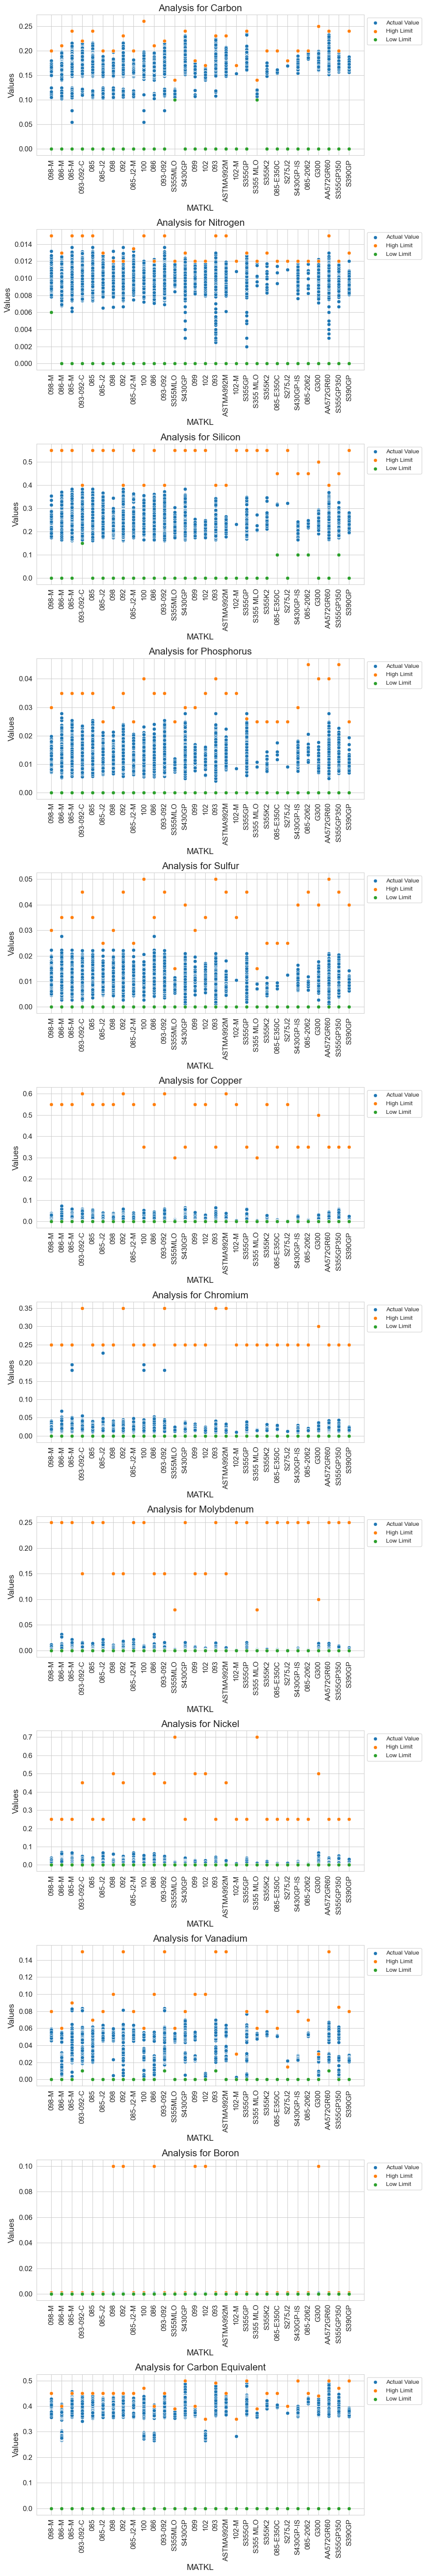

In [57]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the dataframes on the 'MATKL' column
merged_df = pd.merge(df_2, zqm_limuts, on='MATKL', how='left')

# Define the composition mapping
composition_mapping = {
    "ZCARBON": "Carbon",
    "ZNITRO": "Nitrogen",
    "ZSILICON": "Silicon",
    "ZPHOS": "Phosphorus",
    "ZSULP": "Sulfur",
    "ZCOPP": "Copper",
    "ZCHROM": "Chromium",
    "ZMOLY": "Molybdenum",
    "ZNICK": "Nickel",
    "ZVAND": "Vanadium",
    "ZBORON": "Boron",
    "ZCEQ": "Carbon Equivalent"
}

def check_ranges_seaborn(df, key_pairs):
    # Create a long-form DataFrame for easier plotting with seaborn
    plot_data = pd.DataFrame()
    for key, (high, low) in key_pairs.items():
        temp_df = df[['MATKL', key, high, low]].copy()
        temp_df.rename(columns={key: 'actual_value', high: 'high_value', low: 'low_value'}, inplace=True)
        temp_df['element'] = key
        plot_data = pd.concat([plot_data, temp_df])

    # Initialize a large enough figure to hold all subplots
    num_keys = len(key_pairs)
    plt.figure(figsize=(10, 5 * num_keys))

    # Customize font sizes
    tick_label_size = 12  # Adjust size for tick labels
    axis_label_size = 14  # Adjust size for axis labels
    title_size = 16       # Adjust size for titles

    # Plot each element in a separate subplot
    for i, element in enumerate(key_pairs.keys(), 1):
        plt.subplot(num_keys, 1, i)
        data_subset = plot_data[plot_data['element'] == element]
        sns.scatterplot(data=data_subset, x='MATKL', y='actual_value', label='Actual Value')
        sns.scatterplot(data=data_subset, x='MATKL', y='high_value', label='High Limit')
        sns.scatterplot(data=data_subset, x='MATKL', y='low_value', label='Low Limit')

        # Using composition mapping for title
        plt.title(f'Analysis for {composition_mapping[element]}', fontsize=title_size)
        plt.xlabel('MATKL', fontsize=axis_label_size)
        plt.ylabel('Values', fontsize=axis_label_size)

        # Set the font size for tick labels
        plt.xticks(rotation=90, fontsize=tick_label_size)
        plt.yticks(fontsize=tick_label_size)

        # Place the legend outside the plot
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()


key_value_pairs = {

    "ZCARBON" :('Z_C_HI', 'Z_C_LOW'),
    "ZNITRO" :('Z_N2_HI', 'Z_N2_LOW'),
    "ZSILICON" :('Z_SI_HI', 'Z_SI_LOW'),
    "ZPHOS" :('Z_PH_HI', 'Z_PH_LOW'),
    "ZSULP" :('Z_S_HI', 'Z_S_LOW'),
    "ZCOPP" :('Z_CU_HI', 'Z_CU_LOW'),
    "ZCHROM" :('Z_CR_HI', 'Z_CR_LOW'),
    "ZMOLY" :('Z_MB_HI', 'Z_MB_LOW'),
    "ZNICK" :('Z_NI_HI', 'Z_NI_LOW'),
    "ZVAND" :('Z_VN_HI', 'Z_VN_LOW'),
    "ZBORON" :('Z_B_HI', 'Z_B_LOW'),
    "ZCEQ" :('Z_CEQ_HI', 'Z_CEQ_LOW'),
}

 
# Perform the range checking and plotting using seaborn
check_ranges_seaborn(merged_df, key_value_pairs)


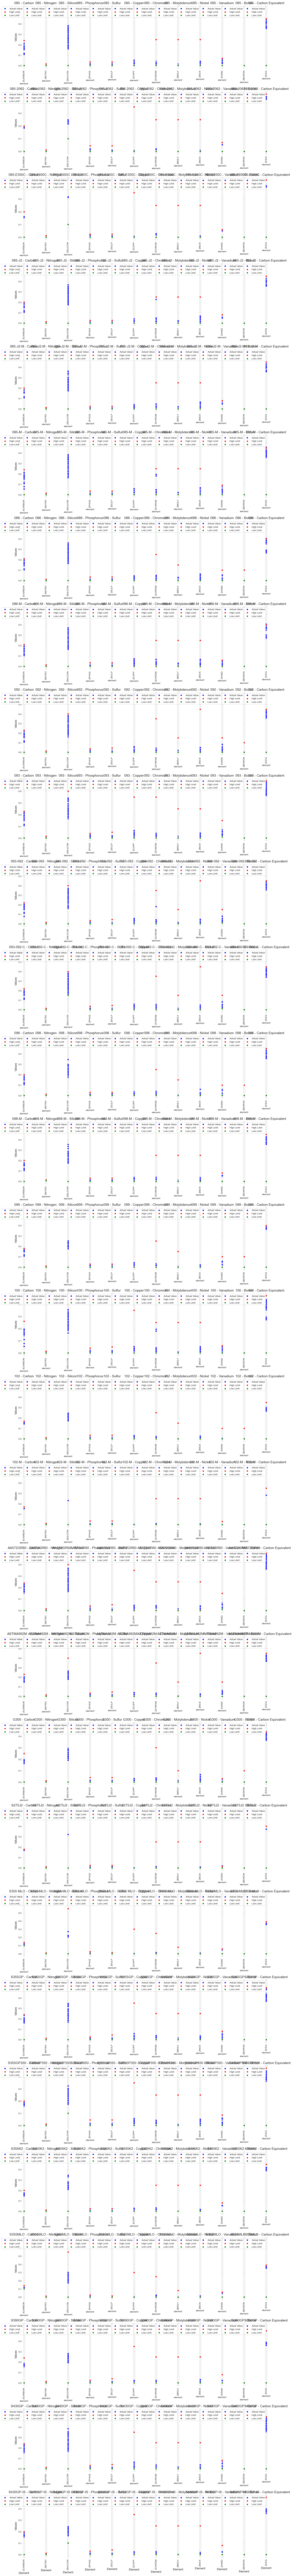

In [40]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the dataframes on the 'MATKL' column
merged_df = pd.merge(df_2, zqm_limuts, on='MATKL', how='left')

# Define the composition mapping
composition_mapping = {
    "ZCARBON": "Carbon",
    "ZNITRO": "Nitrogen",
    "ZSILICON": "Silicon",
    "ZPHOS": "Phosphorus",
    "ZSULP": "Sulfur",
    "ZCOPP": "Copper",
    "ZCHROM": "Chromium",
    "ZMOLY": "Molybdenum",
    "ZNICK": "Nickel",
    "ZVAND": "Vanadium",
    "ZBORON": "Boron",
    "ZCEQ": "Carbon Equivalent"
}

def check_ranges_seaborn(df, key_pairs):
    # Create a long-form DataFrame for easier plotting with seaborn
    plot_data = pd.DataFrame()
    for key, (high, low) in key_pairs.items():
        temp_df = df[['MATKL', key, high, low]].copy()
        temp_df.rename(columns={key: 'actual_value', high: 'high_value', low: 'low_value'}, inplace=True)
        temp_df['element'] = key
        plot_data = pd.concat([plot_data, temp_df])

    # Determine the layout of the subplots
    num_elements = len(key_pairs)
    num_steel_grades = plot_data['MATKL'].nunique()
    fig, axes = plt.subplots(num_steel_grades, num_elements, figsize=(15, 5 * num_steel_grades), sharey='row')

    # Adjust subplot indices if there's only one row or column
    if num_steel_grades == 1 or num_elements == 1:
        axes = np.array(axes).reshape(num_steel_grades, num_elements)

    # Customize font sizes
    tick_label_size = 10  # Adjust size for tick labels
    axis_label_size = 12  # Adjust size for axis labels
    title_size = 14       # Adjust size for titles

    # Iterate over each subplot which is a combination of steel grade and element
    for i, steel_grade in enumerate(sorted(plot_data['MATKL'].unique())):
        for j, element in enumerate(key_pairs.keys()):
            ax = axes[i, j]
            data_subset = plot_data[(plot_data['MATKL'] == steel_grade) & (plot_data['element'] == element)]
            sns.scatterplot(ax=ax, data=data_subset, x='element', y='actual_value', color='blue', label='Actual Value')
            sns.scatterplot(ax=ax, data=data_subset, x='element', y='high_value', color='red', label='High Limit')
            sns.scatterplot(ax=ax, data=data_subset, x='element', y='low_value', color='green', label='Low Limit')

            # Set titles and labels
            if j == 0:
                ax.set_ylabel('Values', fontsize=axis_label_size)
            if i == num_steel_grades - 1:
                ax.set_xlabel('Element', fontsize=axis_label_size)
            ax.set_title(f'{steel_grade} - {composition_mapping[element]}', fontsize=title_size)
            ax.tick_params(axis='x', labelrotation=90)

    plt.tight_layout()
    plt.show()

key_value_pairs = {
    "ZCARBON" :('Z_C_HI', 'Z_C_LOW'),
    "ZNITRO" :('Z_N2_HI', 'Z_N2_LOW'),
    "ZSILICON" :('Z_SI_HI', 'Z_SI_LOW'),
    "ZPHOS" :('Z_PH_HI', 'Z_PH_LOW'),
    "ZSULP" :('Z_S_HI', 'Z_S_LOW'),
    "ZCOPP" :('Z_CU_HI', 'Z_CU_LOW'),
    "ZCHROM" :('Z_CR_HI', 'Z_CR_LOW'),
    "ZMOLY" :('Z_MB_HI', 'Z_MB_LOW'),
    "ZNICK" :('Z_NI_HI', 'Z_NI_LOW'),
    "ZVAND" :('Z_VN_HI', 'Z_VN_LOW'),
    "ZBORON" :('Z_B_HI', 'Z_B_LOW'),
    "ZCEQ" :('Z_CEQ_HI', 'Z_CEQ_LOW'),
}

# Perform the range checking and plotting using seaborn
check_ranges_seaborn(merged_df, key_value_pairs)


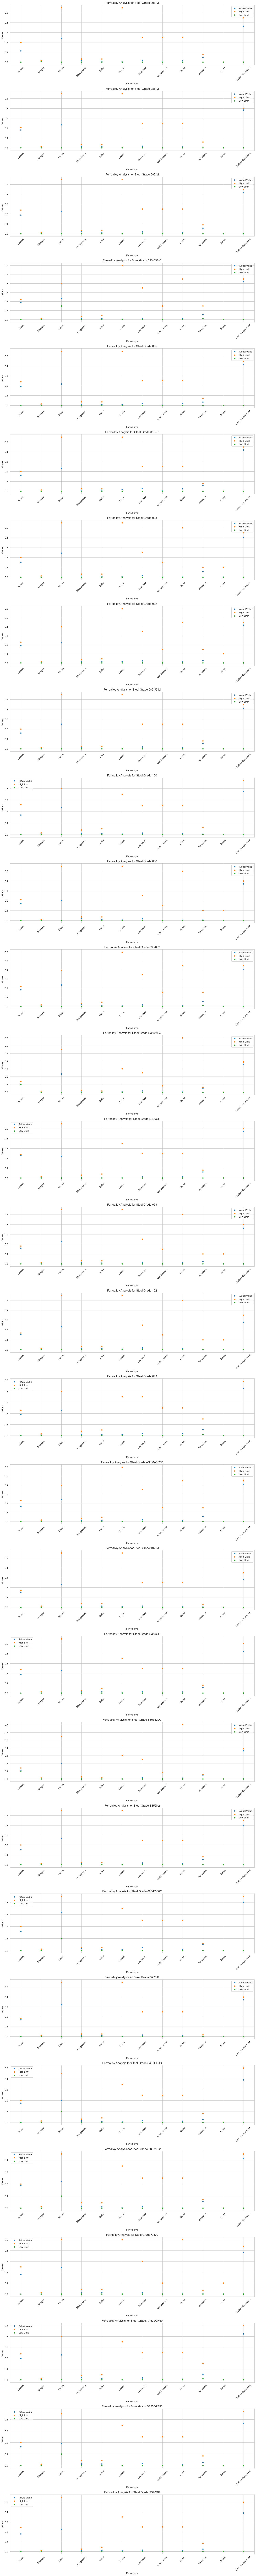

In [35]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2 and zqm_limuts are already defined and merged
merged_df = pd.merge(df_2, zqm_limuts, on='MATKL', how='left')

# Define the composition mapping
composition_mapping = {
    "ZCARBON": "Carbon",
    "ZNITRO": "Nitrogen",
    "ZSILICON": "Silicon",
    "ZPHOS": "Phosphorus",
    "ZSULP": "Sulfur",
    "ZCOPP": "Copper",
    "ZCHROM": "Chromium",
    "ZMOLY": "Molybdenum",
    "ZNICK": "Nickel",
    "ZVAND": "Vanadium",
    "ZBORON": "Boron",
    "ZCEQ": "Carbon Equivalent"
}

# Function to plot values for each steel grade
def plot_per_matkl(df, key_pairs):
    # Extract unique steel grades
    steel_grades = df['MATKL'].unique()

    # Initialize the figure with a subplot for each steel grade
    num_grades = len(steel_grades)
    plt.figure(figsize=(15, 5 * num_grades))

    for i, grade in enumerate(steel_grades, 1):
        plt.subplot(num_grades, 1, i)
        grade_data = df[df['MATKL'] == grade]

        # Prepare data for plotting
        elements = []
        actual_values = []
        high_values = []
        low_values = []

        for element, (high, low) in key_pairs.items():
            elements.append(element)
            actual_values.append(grade_data[element].values[0])
            high_values.append(grade_data[high].values[0])
            low_values.append(grade_data[low].values[0])

        # Create a DataFrame for easy plotting
        plot_data = pd.DataFrame({
            'Element': [composition_mapping[el] for el in elements],
            'Actual Value': actual_values,
            'High Limit': high_values,
            'Low Limit': low_values
        })

        # Plotting
        sns.scatterplot(x='Element', y='Actual Value', data=plot_data, marker='o', label='Actual Value')
        sns.scatterplot(x='Element', y='High Limit', data=plot_data, marker='o', label='High Limit')
        sns.scatterplot(x='Element', y='Low Limit', data=plot_data, marker='o', label='Low Limit')

        plt.title(f'Ferroalloy Analysis for Steel Grade {grade}')
        plt.ylabel('Values')
        plt.xlabel('Ferroalloys')
        plt.xticks(rotation=45)
        plt.legend()

    plt.tight_layout()
    plt.show()

key_value_pairs = {
    "ZCARBON": ('Z_C_HI', 'Z_C_LOW'),
    "ZNITRO": ('Z_N2_HI', 'Z_N2_LOW'),
    "ZSILICON": ('Z_SI_HI', 'Z_SI_LOW'),
    "ZPHOS": ('Z_PH_HI', 'Z_PH_LOW'),
    "ZSULP": ('Z_S_HI', 'Z_S_LOW'),
    "ZCOPP": ('Z_CU_HI', 'Z_CU_LOW'),
    "ZCHROM": ('Z_CR_HI', 'Z_CR_LOW'),
    "ZMOLY": ('Z_MB_HI', 'Z_MB_LOW'),
    "ZNICK": ('Z_NI_HI', 'Z_NI_LOW'),
    "ZVAND": ('Z_VN_HI', 'Z_VN_LOW'),
    "ZBORON": ('Z_B_HI', 'Z_B_LOW'),
    "ZCEQ": ('Z_CEQ_HI', 'Z_CEQ_LOW')
}

# Call the plotting function
plot_per_matkl(merged_df, key_value_pairs)




In [38]:


len(steel_grades)


NameError: name 'steel_grades' is not defined

# Results-2 

In [58]:

df = mtc_results.copy()


# List of columns for which we want to calculate means and label above-mean values
columns_to_check = ['ZCARBON',
                    'ZSILICON',
                    'ZMANG',
                    'ZPHOS',
                    'ZSULP',
                    'ZNITRO',
                    'ZCOPP',
                    'ZCHROM',
                    'ZMOLY',
                    'ZNICK',
                    'ZVAND',
                    'ZBORON',
                    'ZCEQ']


group_means = df.groupby('MATKL')[columns_to_check].mean().reset_index()

group_means = group_means.rename(columns={col: f'mean_{col}' for col in columns_to_check})

df = df.merge(group_means, on='MATKL', how='left')

# For each column, create a new column that indicates if the value is above the group mean
for col in columns_to_check:
    df[f'is_above_mean_{col}'] = df[col] > 1.2 * df[f'mean_{col}']
    df[f'points_above_mean_{col}'] = df[col] - df[f'mean_{col}']
    df[f'weighted_tons_{col}'] = df['WGHT'] * df[f'points_above_mean_{col}'] /100


# weighted_tons_col=(WGHT×points_above_mean_col)/100



In [59]:


df_silicon =df[df["is_above_mean_ZSILICON"] == True]
df_silicon[['MATKL','mean_ZSILICON','points_above_mean_ZSILICON','weighted_tons_ZSILICON','WGHT']]
df_silicon = df_silicon[df_silicon["MATKL"] == "085-M"]
df_silicon = df_silicon[['MATKL','mean_ZSILICON','points_above_mean_ZSILICON','weighted_tons_ZSILICON','WGHT']]
# df_silicon




The total cost of excess ferroalloy consumption for a specific type \( f \) across all batches is calculated with the following formula:

$$
\[
\text{Total Cost} = \sum_{i=1}^{n} \max\left(C_{i,f} - \frac{\sum_{j=1}^{n} C_{j,f}}{n}, 0\right) \times p_f
\]
$$



- $$\( C_{i,f} \)$$ represents the consumption of ferroalloy type \( f \) for the batch \( i \).
- \( n \) is the total number of batches for the steel grade being analyzed.
- \( p_f \) is the price per unit of the ferroalloy type \( f \).

### Explanation:
- **Mean Consumption Calculation**: $$\( \frac{\sum_{j=1}^{n} C_{j,f}}{n} \)$$ computes the average consumption of ferroalloy type \( f \) across all batches, providing a baseline for comparison.
- **Excess Calculation**: For each batch, $$\( \max\left(C_{i,f} - \text{mean}, 0\right) \)$$ determines the excess consumption by comparing each batch's consumption to the average. If a batch's consumption is less than or equal to the average, the excess is considered zero.
- **Cost Calculation**: The excess (if any) is then multiplied by the price $$\( p_f \)$$, resulting in the cost for that batch. The total cost is the sum of these individual costs across all batches.




In [60]:

df


VBELN  ZCASTNO  ZROW     ERDAT  MATKL   ZCARBON  ZSILICON     ZMANG  \
0      20523615  2084378     1  20230918  098-M  0.112333  0.242433  1.423633   
1      20523615  2093357     1  20230918  098-M  0.110200  0.209367  1.423067   
2      20523615  2093359     1  20230918  098-M  0.104433  0.221633  1.447233   
3      20523615  2093364     1  20230918  098-M  0.110767  0.242233  1.439700   
4      20523615  2097143     1  20230918  098-M  0.105667  0.199667  1.428000   
...         ...      ...   ...       ...    ...       ...       ...       ...   
99300  80536729  2100588     1  20231231    086  0.175000  0.241333  1.212667   
99301  80536729  2100629     1  20231231    086  0.167333  0.297000  1.171000   
99302  80536730  2100584     1  20231231    086  0.159333  0.268667  1.172000   
99303  80536730  2100588     1  20231231    086  0.175000  0.241333  1.212667   
99304  80536731  2103558     1  20231231  086-M  0.170000  0.329667  1.162000   

          ZPHOS     ZSULP  ...  weighted_tons_ZNICK  is_above_mean_ZVAND  \
0      0.011500  0.008000  ...            -0.000007                False   
1      0.011933  0.006967  ...            -0.000019                False   
2      0.011533  0.006567  ...            -0.000026                False   
3      0.011533  0.007967  ...            -0.000043                False   
4      0.009233  0.009933  ...            -0.000069                False   
...         ...       ...  ...                  ...                  ...   
99300  0.009667  0.010000  ...            -0.000044                False   
99301  0.010300  0.007300  ...            -0.000133                False   
99302  0.010433  0.010300  ...             0.000275                False   
99303  0.009667  0.010000  ...            -0.000062                False   
99304  0.010400  0.009767  ...             0.000391                False   

       points_above_mean_ZVAND  weighted_tons_ZVAND  is_above_mean_ZBORON  \
0                    -0.006836            -0.000096                 False   
1                    -0.005470            -0.000077                 False   
2                    -0.006070            -0.000085                 False   
3                    -0.001436            -0.000040                 False   
4                    -0.008336            -0.000117                 False   
...                        ...                  ...                   ...   
99300                -0.005355            -0.000285                 False   
99301                -0.005188            -0.000827                 False   
99302                -0.003288            -0.000175                 False   
99303                -0.005355            -0.000398                 False   
99304                -0.003316            -0.000150                 False   

       points_above_mean_ZBORON  weighted_tons_ZBORON  is_above_mean_ZCEQ  \
0                      0.000044          6.121840e-07               False   
1                      0.000044          6.121840e-07               False   
2                      0.000010          1.435221e-07               False   
3                      0.000010          2.869420e-07               False   
4                      0.000010          1.435221e-07               False   
...                         ...                   ...                 ...   
99300                 -0.000063         -3.363557e-06               False   
99301                 -0.000063         -1.009257e-05               False   
99302                 -0.000163         -8.680190e-06               False   
99303                 -0.000063         -4.709612e-06               False   
99304                 -0.000026         -1.156959e-06               False   

       points_above_mean_ZCEQ  weighted_tons_ZCEQ  
0                   -0.042393           -0.000596  
1                   -0.045172           -0.000635  
2                   -0.046755           -0.000657  
3                   -0.040873           -0.001149  
4             

In [61]:

df.to_csv("final_results_2024.csv")



In [62]:




ZNITRO_towards_high = df[df["is_above_mean_ZNITRO"] == True]
ZSILICON_towards_high = df[df["is_above_mean_ZSILICON"] == True]
ZPHOS_towards_high = df[df["is_above_mean_ZPHOS"] == True]
ZSULP_towards_high = df[df["is_above_mean_ZSULP"] == True]
ZCOPP_towards_high = df[df["is_above_mean_ZCOPP"] == True]
ZCHROM_towards_high = df[df["is_above_mean_ZCHROM"] == True]
ZMOLY_towards_high = df[df["is_above_mean_ZMOLY"] == True]
ZNICK_towards_high = df[df["is_above_mean_ZNICK"] == True]
ZVAND_towards_high = df[df["is_above_mean_ZVAND"] == True]
ZBORON_towards_high = df[df["is_above_mean_ZBORON"] == True]
ZCEQ_towards_high = df[df["is_above_mean_ZCEQ"] == True]
ZMANG_towards_high = df[df["is_above_mean_ZMANG"] == True]
ZCARBON_towards_high = df[df["is_above_mean_ZCARBON"] == True]

 


In [63]:




results = {
    "Silicon":ZSILICON_towards_high["weighted_tons_ZSILICON"].sum(),
    "Chromium": ZCHROM_towards_high["weighted_tons_ZCHROM"].sum(),
    "Molybdenum": ZMOLY_towards_high["weighted_tons_ZMOLY"].sum(),
    "Nickel": ZNICK_towards_high["weighted_tons_ZNICK"].sum() ,
    "Vanadium": ZVAND_towards_high["weighted_tons_ZVAND"].sum(),
    "Manganese": ZMANG_towards_high["weighted_tons_ZMANG"].sum(),
}


results



{'Silicon': 79.13906333303913,
 'Chromium': 7.156238727566412,
 'Molybdenum': 2.5049207286595054,
 'Nickel': 9.298588973552611,
 'Vanadium': 20.223833626184362,
 'Manganese': 1.5604468038707417}

In [64]:


# Prices per ton for each material
prices_per_ton = {
    "Silicon": 6247,
    "Chromium": 6143,
    "Molybdenum": 45537,
    "Nickel": 53802,
    "Vanadium": 100700,
    "Manganese": 5418,
}

prices_per_ton



{'Silicon': 6247,
 'Chromium': 6143,
 'Molybdenum': 45537,
 'Nickel': 53802,
 'Vanadium': 100700,
 'Manganese': 5418}

In [65]:

total_costs = {material: results[material] * prices_per_ton[material] for material in results}
total_costs


{'Silicon': 494381.72864149546,
 'Chromium': 43960.774503440465,
 'Molybdenum': 114066.5752209679,
 'Nickel': 500282.6839550776,
 'Vanadium': 2036540.0461567652,
 'Manganese': 8454.500783371679}

In [66]:

overall_total_cost = sum(total_costs.values())
overall_total_cost


3197686.309261118

In [67]:

results


{'Silicon': 79.13906333303913,
 'Chromium': 7.156238727566412,
 'Molybdenum': 2.5049207286595054,
 'Nickel': 9.298588973552611,
 'Vanadium': 20.223833626184362,
 'Manganese': 1.5604468038707417}

In [68]:
# tons overshot:
sum(list(results.values()))


119.88309219287277

In [69]:
# overall tons produced
df["WGHT"].sum()


567337.9169999999

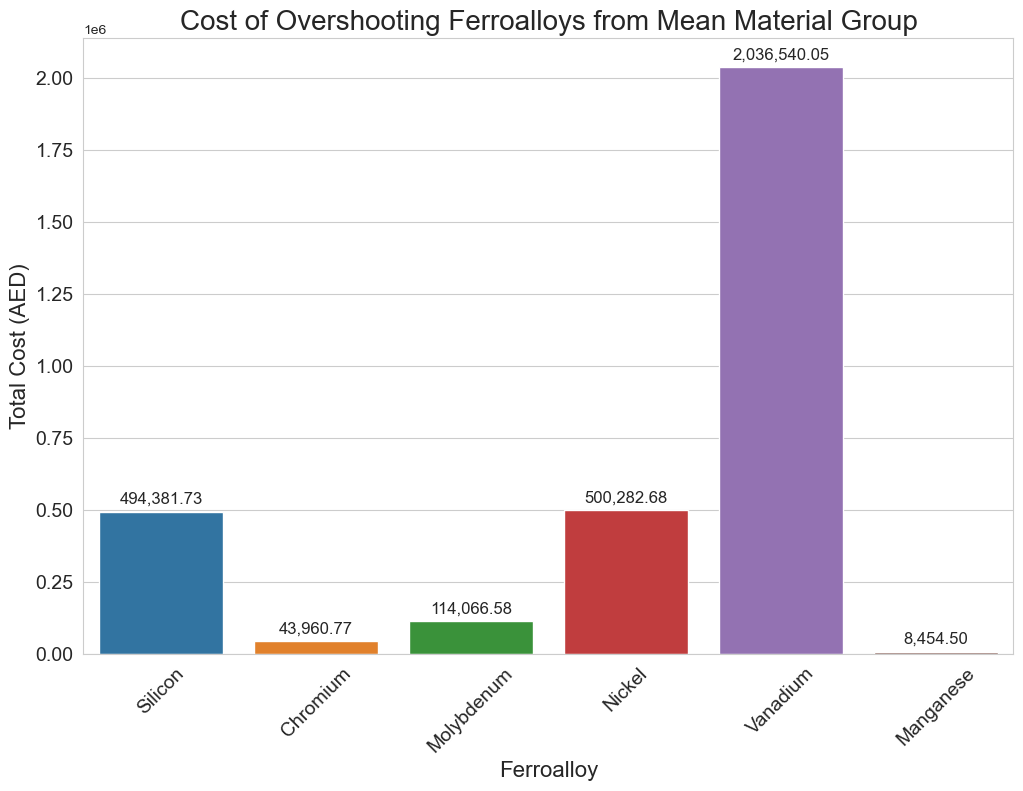

In [70]:


costs = {key: results[key] * prices_per_ton[key] for key in results}

# Convert the costs dictionary to a DataFrame for easier plotting
costs_df = pd.DataFrame(list(costs.items()), columns=['Ferroalloy', 'Cost'])

# Creating the bar plot
plt.figure(figsize=(12, 8))  # Increased figure size for better display
bar_plot = sns.barplot(x='Ferroalloy', y='Cost', data=costs_df)
plt.title('Cost of Overshooting Ferroalloys from Mean Material Group', fontsize=20)  # Increase font size for the title
plt.xlabel('Ferroalloy', fontsize=16)  # Increase font size for x-axis label
plt.ylabel('Total Cost (AED)', fontsize=16)  # Increase font size for y-axis label
plt.xticks(rotation=45, fontsize=14)  # Rotate and increase font size of x-axis ticks
plt.yticks(fontsize=14)  # Increase font size of y-axis ticks

# Annotating the bars with the exact cost values
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), ',.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=12)  # Optional: adjust annotation font size if needed

plt.show()






$$
C = (F_i - \overline{F}) * P
$$
*   <span class="math-inline">C</span> represents the overshot cost
*   <span class="math-inline">F\_i</span> represents individual ferroalloys consumption
*   <span class="math-inline">\\overline\{F\}</span> is the mean ferroalloys consumption
*   <span class="math-inline">P</span> is the ferroalloys price



